In [ ]:
print("hello world")

hello world


In [ ]:
# we need to append the datasets for the 2 dataset

import pandas as pd


data_1 = pd.read_csv('/Users/DELL/Desktop/DMG/4 assignment /data_1.csv')
data_2 = pd.read_csv('/Users/DELL/Desktop/DMG/4 assignment /data_2.csv')

dataset1= pd.read_csv('/Users/DELL/Desktop/DMG/4 assignment /healthy.csv')

dataset3= pd.read_csv('/Users/DELL/Desktop/DMG/4 assignment /Banking dataset.csv')

#concatenate the 2 datasets....
dataset2 = pd.concat([data_1, data_2], axis=0, ignore_index=True)




In [ ]:
#name of the 2 dataset..
dataset2.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1


**Decision tree classifier Q1**

Accuracy: 0.9360


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


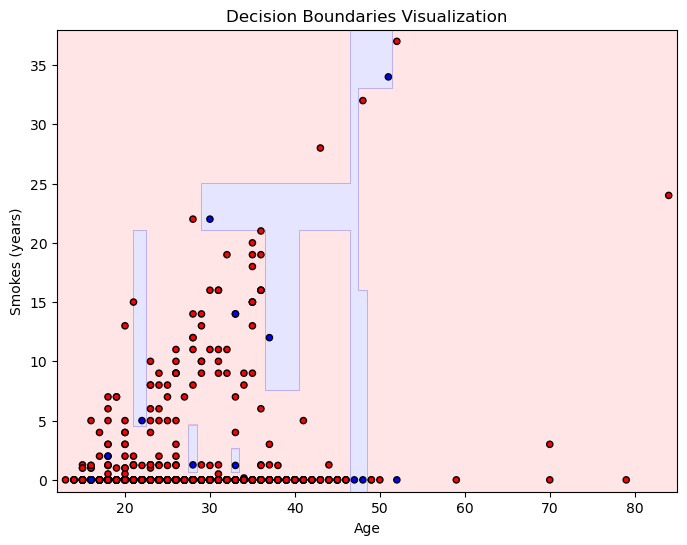

In [ ]:
# Q1...
#For the 1 dataset..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Assuming you have a DataFrame named dataset1

# Assuming your target variable is named 'Biopsy'
X = dataset1.drop('Biopsy', axis=1)  # Features
y = dataset1['Biopsy']  # Target variable

# Select two features for visualization
feature1 = 'Age'
feature2 = 'Smokes (years)'

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# change missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization')
plt.show()


"""decision boundaries are plotted along with the scatter plot of the selected features,
and the resulting visualization is displayed. This helps in understanding how the decision tree
classifier separates different classes in the feature space"""

An **ROC** curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters
True Positive Rate and
False Positive Rate

**AUC** stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

Cross-Validated Accuracy: 0.9324
Cross-Validated Precision: 0.4769
Cross-Validated Recall: 0.4000
Cross-Validated F1 Score: 0.4241
Cross-Validated AUC-ROC Score: 0.6844


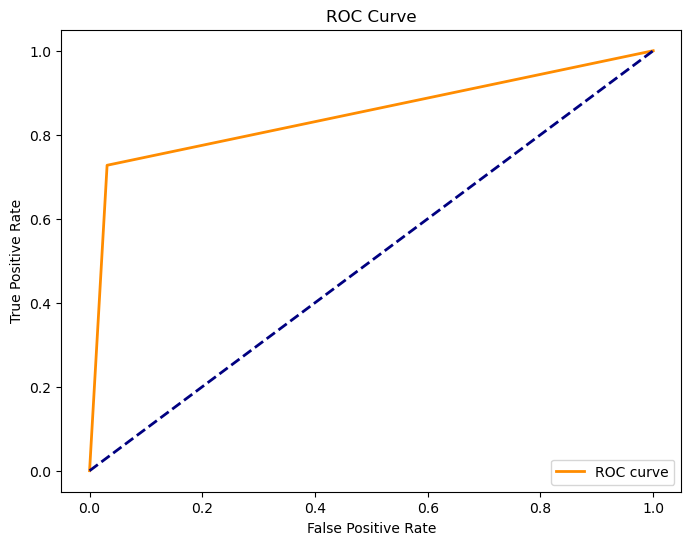

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named dataset1

#  your target variable is'Biopsy'
X = dataset1.drop('Biopsy', axis=1)  # Features
y = dataset1['Biopsy']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the classifier using cross-validation
accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(clf, X, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(clf, X, y, cv=cv, scoring='recall')
f1_scores = cross_val_score(clf, X, y, cv=cv, scoring='f1')
roc_auc_scores = cross_val_score(clf, X, y, cv=cv, scoring='roc_auc')

# Print the cross-validated evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Cross-Validated Precision: {np.mean(precision_scores):.4f}")
print(f"Cross-Validated Recall: {np.mean(recall_scores):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(roc_auc_scores):.4f}")

# Plot the ROC curve using the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# your target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# 5 cross over folds
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

# Print the cross-validation evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Cross-Validated Precision: {np.mean(precision_scores):.4f}")
print(f"Cross-Validated Recall: {np.mean(recall_scores):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(roc_auc_scores):.4f}")



Cross-Validated Accuracy: 0.9182
Cross-Validated Precision: 0.9185
Cross-Validated Recall: 0.9182
Cross-Validated F1 Score: 0.9180
Cross-Validated AUC-ROC Score: 0.8952


A decision boundary is a line or surface that separates different regions in data space. It is used to make decisions about which class a new data point belongs to

Accuracy: 0.8380


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


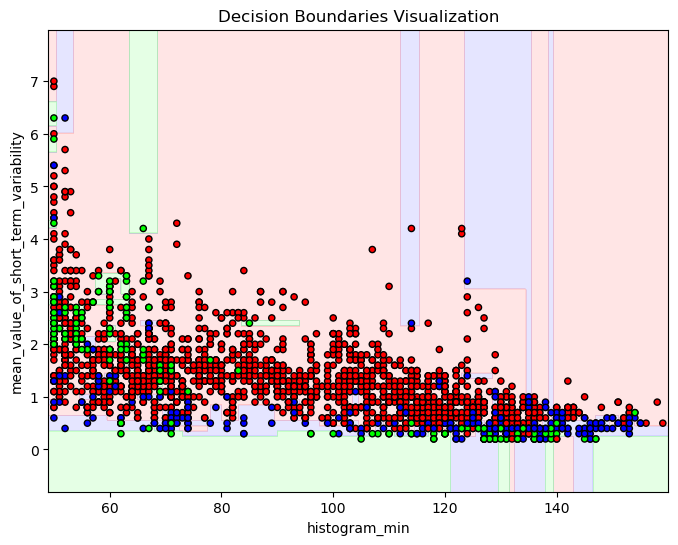

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap



#  target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Select two features for visualization
feature1 = 'histogram_min'
feature2 = 'mean_value_of_short_term_variability'

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_visualization[feature1].min() - 1, X_visualization[feature1].max() + 1
y_min, y_max = X_visualization[feature2].min() - 1, X_visualization[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization')
plt.show()


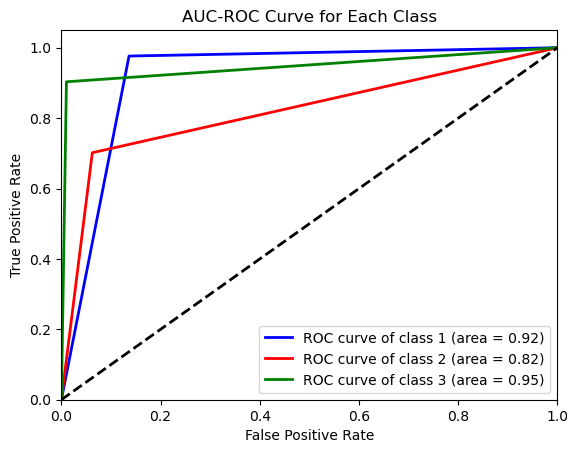

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle


#  target variable is named 'fetal_health'
X = dataset2.drop('fetal_health', axis=1)  # Features
y = dataset2['fetal_health']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Binarize the output
y_bin = label_binarize(y, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

# Train the classifier
clf.fit(X_train, y_train)

# Plot AUC-ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()



# for the dataset 3 ...


Cross-Validated Accuracy: 0.8898
Cross-Validated Precision: 0.5109
Cross-Validated Recall: 0.5200
Cross-Validated F1 Score: 0.5153
Cross-Validated AUC-ROC Score: 0.7284


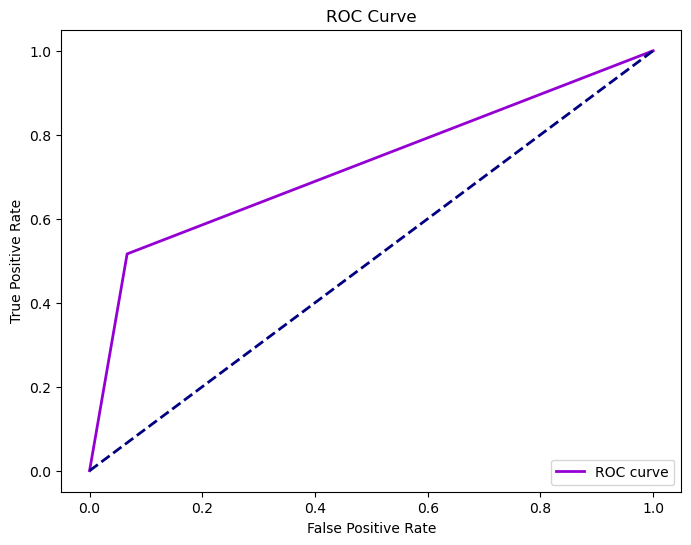

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


X = dataset3.drop('y', axis=1)  # Features
y = dataset3['y']  # Target variable

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Input missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over 5cross folds
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

# Print the cross-validated evaluation metrics
print(f"Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Cross-Validated Precision: {np.mean(precision_scores):.4f}")
print(f"Cross-Validated Recall: {np.mean(recall_scores):.4f}")
print(f"Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")
print(f"Cross-Validated AUC-ROC Score: {np.mean(roc_auc_scores):.4f}")

# Plot the ROC curve using the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkviolet', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


x_min: 0.634, x_max: 5.045
y_min: 0, y_max: 4918
Adjusted x_min: -0.366, x_max: 6.045
Adjusted y_min: -1.0, y_max: 4919.0


/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


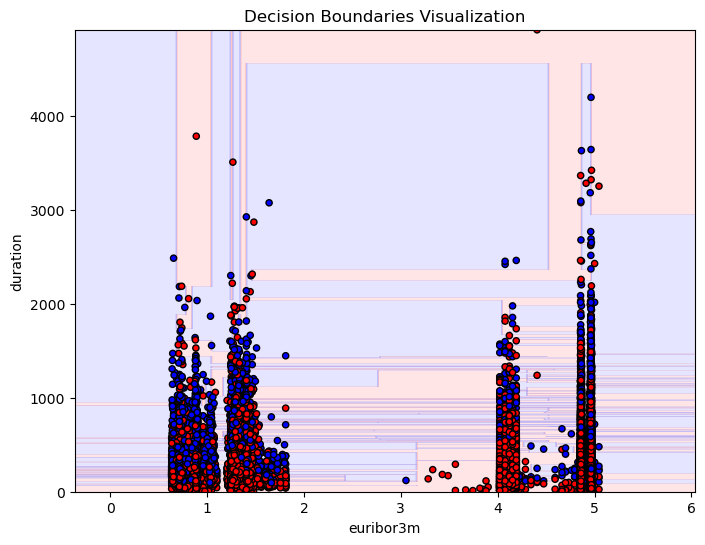

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Assuming you have a DataFrame named dataset3
# Replace this with your actual data loading logic
# For example, if your data is in a CSV file, you can use: pd.read_csv('path_to_dataset3.csv')

# Assuming your target variable is named 'y'
X = dataset3.drop('y', axis=1)  # Features
y = dataset3['y']  # Target variable

# Select two features for visualization (change these according to your dataset)
feature1 = 'euribor3m'  # Replace with the actual feature name
feature2 = 'duration'  # Replace with the actual feature name

# Handle non-numeric values
X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Select only two features for visualization
X_visualization = X[[feature1, feature2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Print the min and max values of features for debugging
print(f"x_min: {X_visualization[feature1].min()}, x_max: {X_visualization[feature1].max()}")
print(f"y_min: {X_visualization[feature2].min()}, y_max: {X_visualization[feature2].max()}")

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = float(X_visualization[feature1].min()) - 1, float(X_visualization[feature1].max()) + 1
y_min, y_max = float(X_visualization[feature2].min()) - 1, float(X_visualization[feature2].max()) + 1

print(f"Adjusted x_min: {x_min}, x_max: {x_max}")
print(f"Adjusted y_min: {y_min}, y_max: {y_max}")

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_visualization[feature1], X_visualization[feature2], c=y, cmap=cmap_points, edgecolors='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries Visualization')
plt.show()
